**라이브러리 Import 하기**

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data(given)**

In [2]:
x_train = [1, 2, 3, 4, 5]
y_train = [5+0.1, 8-0.53, 11+0.61, 14-0.33, 17+0.49]
# 정답은 y=3x+2
#signal_length = len(x_train)
#y_noise = np.random.normal(0, 1, signal_length)#평균이 0이고 표준편차가 1인 signal_length개의 데이터
#y_train = y_train + y_noise

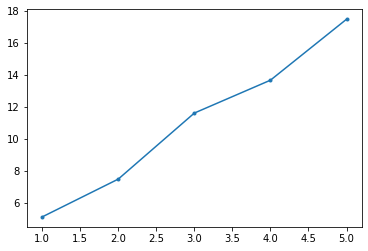

In [3]:
plt.plot(x_train, y_train, '.-')

**Initialization**

In [4]:
useRandom = False

In [5]:
if useRandom : 
  W = tf.Variable(tf.random_normal([1]), name='weight')
  b = tf.Variable(tf.random_normal([1]), name='bias')
  
else:
  w0 = 100;
  b0 = -100;
  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')
  




**Our hypothesis**
$$ H(x) = Wx + b $$
가설의 모양은 선

In [6]:
hypothesis = x_train * W + b

W와 b는 컴퓨터가 맞추는 것

**cost/loss function 정의하기**
* loss of one training example

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**
* W를 맞추는 것을 계산함

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss) #optimizer에게 loss 최소화하라고 함

**Launch the graph in a session**

In [9]:
sess = tf.Session()

**Initializes global variables in the graph**

In [10]:
sess.run(tf.global_variables_initializer()) #초기화

In [11]:
nb_epoch = 3001 # 반복
vloss = []
vb = []
vw = []
for step in range(nb_epoch):
    sess.run(train) #train은 optimizer로 loss최소화하는 것 
    loss1 = sess.run(loss)
    w1 = sess.run(W)[0] # 기울기
    b1 = sess.run(b)[0] # bias  
    
    vloss.append(loss1)
    vb.append(b1)
    vw.append(w1)

    #찍어보기
    if step % 200 == 0: # 200번마다
          print(step,'\t',loss1,'\t', w1,'\t', b1)

0 	 32811.79 	 84.788 	 -103.77864
200 	 665.78296 	 19.847664 	 -58.697605
400 	 171.92502 	 11.606284 	 -28.943605
600 	 44.494495 	 7.419933 	 -13.829549
800 	 11.6134405 	 5.293401 	 -6.1520925
1000 	 3.1291175 	 4.2131915 	 -2.2521956
1200 	 0.93990076 	 3.664481 	 -0.27117613
1400 	 0.37501532 	 3.3857539 	 0.73511696
1600 	 0.22925727 	 3.2441697 	 1.2462814
1800 	 0.1916473 	 3.1722493 	 1.5059358
2000 	 0.18194285 	 3.1357162 	 1.6378323
2200 	 0.1794388 	 3.1171587 	 1.7048309
2400 	 0.1787926 	 3.107732 	 1.738864
2600 	 0.17862591 	 3.1029434 	 1.7561525
2800 	 0.17858292 	 3.1005113 	 1.7649333
3000 	 0.17857182 	 3.0992763 	 1.7693931


Text(0, 0.5, 'loss')

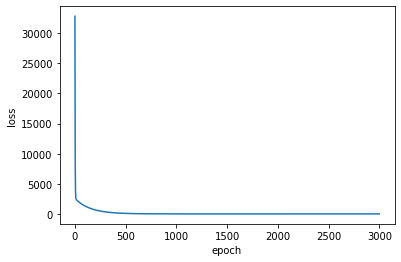

In [12]:
plt.plot(vloss)
plt.xlabel('epoch')
plt.ylabel('loss')

TODO : w, b의 epoch에 따른 변화 그래프 넣기

Text(0, 0.5, 'b')

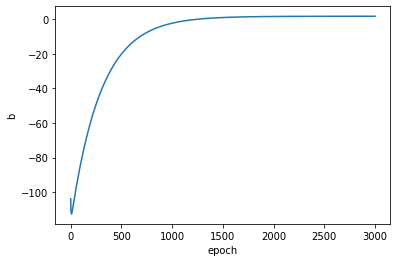

In [13]:
plt.plot(vb)
plt.xlabel('epoch')
plt.ylabel('b')

Text(0, 0.5, 'W')

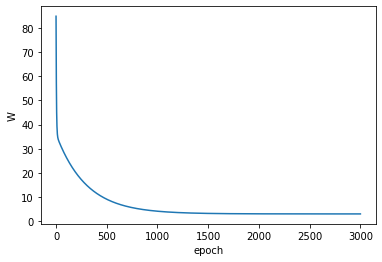

In [14]:
plt.plot(vw)
plt.xlabel('epoch')
plt.ylabel('W')

**학습완료**

In [15]:
w1 = sess.run(W)[0] #기울기
b1 = sess.run(b)[0] #bias

출력해보기

In [16]:
print(w1, b1)

3.0992763 1.7693931


In [17]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 3.0992763x + 1.7693931


Text(0.5, 1.0, 'y = 3.0992763x + 1.7693931')

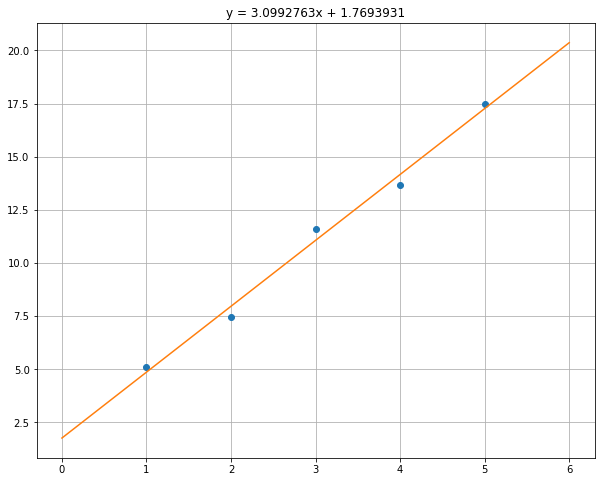

In [19]:
plt.figure(figsize=(10,8)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

### **스스로 해보기**

아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다.

* 예1) 노이즈를 다르게 준다  
 
  x_train = [1, 2, 3]  
  \\ y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
* 예2) 데이터의 갯수를 지금은 네 개의 점으로 했으나 더 늘려서도 해본다.  

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.  
 
 y=3x-5   
  y=1.2x + 3  

* 예4) 초기값인 w0, b0를 다르게 설정해본다.  
 
  w0 = 7.0;  
  b0 = 5.0;  